In [28]:
# importing the required libraries 
import pandas as pd
import numpy as np
import altair as alt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


## Diff-in-Diff Analysis Of Drug Related Prescriptions in Florida

In [29]:
# loading data for drug prescriptions in Florida and neighbouring states 
prescriptions = pd.read_csv("05_cleaned_data/prescriptions_fl.csv",low_memory = False)
prescriptions

,REPORTER_DEA_NO,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_ADDRESS1,REPORTER_ADDRESS2,REPORTER_CITY,REPORTER_STATE,REPORTER_ZIP,REPORTER_COUNTY,...,CountyName,StateName,CountyFIPS,StateAbbr,STATE_COUNTY,state_abbrev,FIP_unique,State,Population,county_test
0,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701.0,SUFFOLK,...,palm beach,Florida,12099,FL,FL | PALM BEACH,FL,1209912,FL,1286586.0,Palm Beach
1,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701.0,SUFFOLK,...,palm beach,Florida,12099,FL,FL | PALM BEACH,FL,1209912,FL,1286586.0,Palm Beach
2,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701.0,SUFFOLK,...,palm beach,Florida,12099,FL,FL | PALM BEACH,FL,1209912,FL,1286586.0,Palm Beach
3,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701.0,SUFFOLK,...,palm beach,Florida,12099,FL,FL | PALM BEACH,FL,1209912,FL,1286586.0,Palm Beach
4,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701.0,SUFFOLK,...,palm beach,Florida,12099,FL,FL | PALM BEACH,FL,1209912,FL,1286586.0,Palm Beach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66472,RC0238104,DISTRIBUTOR,CARDINAL HEALTH,NaN,2512 WESTCOTT BLVD,NaN,KNOXVILLE,TN,37931.0,KNOX,...,grundy,Tennessee,47061,TN,TN | GRUNDY,TN,4706147,TN,13583.0,Grundy
66473,RC0238104,DISTRIBUTOR,CARDINAL HEALTH,NaN,2512 WESTCOTT BLVD,NaN,KNOXVILLE,TN,37931.0,KNOX,...,grundy,Tennessee,47061,TN,TN | GRUNDY,TN,4706147,TN,13583.0,Grundy
66474,RC0238104,DISTRIBUTOR,CARDINAL HEALTH,NaN,2512 WESTCOTT BLVD,NaN,KNOXVILLE,TN,37931.0,KNOX,...,grundy,Tennessee,47061,TN,TN | GRUNDY,TN,4706147,TN,13583.0,Grundy
66475,RC0238104,DISTRIBUTOR,CARDINAL HEALTH,NaN,2512 WESTCOTT BLVD,NaN,KNOXVILLE,TN,37931.0,KNOX,...,grundy,Tennessee,47061,TN,TN | GRUNDY,TN,4706147,TN,13583.0,Grundy


In [30]:
prescriptions.columns

Index(['REPORTER_DEA_NO', 'REPORTER_BUS_ACT', 'REPORTER_NAME',
       'REPORTER_ADDL_CO_INFO', 'REPORTER_ADDRESS1', 'REPORTER_ADDRESS2',
       'REPORTER_CITY', 'REPORTER_STATE', 'REPORTER_ZIP', 'REPORTER_COUNTY',
       'BUYER_DEA_NO', 'BUYER_BUS_ACT', 'BUYER_NAME', 'BUYER_ADDL_CO_INFO',
       'BUYER_ADDRESS1', 'BUYER_ADDRESS2', 'BUYER_CITY', 'BUYER_STATE',
       'BUYER_ZIP', 'BUYER_COUNTY', 'TRANSACTION_CODE', 'DRUG_CODE', 'NDC_NO',
       'DRUG_NAME', 'QUANTITY', 'UNIT', 'ACTION_INDICATOR', 'ORDER_FORM_NO',
       'CORRECTION_NO', 'STRENGTH', 'TRANSACTION_DATE', 'CALC_BASE_WT_IN_GM',
       'DOSAGE_UNIT', 'TRANSACTION_ID', 'Product_Name', 'Ingredient_Name',
       'Measure', 'MME_Conversion_Factor', 'Combined_Labeler_Name',
       'Revised_Company_Name', 'Reporter_family', 'dos_str', 'Year', 'Month',
       'StateFIPS', 'CountyName', 'StateName', 'CountyFIPS', 'StateAbbr',
       'STATE_COUNTY', 'state_abbrev', 'FIP_unique', 'State', 'Population',
       'county_test'],
      dtyp

In [31]:
# reducing the number of columns in the drug prescriptions dataset by including only the relevant attributes to create a new dataset

prescriptions_reduced = prescriptions[
    [
        "DRUG_CODE",
        "DRUG_NAME",
        "QUANTITY",
        "UNIT",
        "STRENGTH",
        "CALC_BASE_WT_IN_GM",
        "DOSAGE_UNIT",
        "Product_Name",
        "Ingredient_Name",
        "Measure",
        "MME_Conversion_Factor",
        "dos_str",
        "Year",
        "Month",
        "StateFIPS",
        "StateName",
        "CountyFIPS",
        "state_abbrev",
        "FIP_unique",
        "Population",
        "county_test",
    ]
]

In [32]:
prescriptions_reduced

,DRUG_CODE,DRUG_NAME,QUANTITY,UNIT,STRENGTH,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,Product_Name,Ingredient_Name,Measure,...,dos_str,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test
0,9143.0,OXYCODONE,3.0,NaN,0.0,21.516000,300.0,OXYCODONE HCL 80MG TABS,OXYCODONE HYDROCHLORIDE,TAB,...,80.0,2007.0,2.0,12,Florida,12099,FL,1209912,1286586.0,Palm Beach
1,9143.0,OXYCODONE,3.0,NaN,0.0,21.516000,300.0,OXYCODONE HCL 80MG TABS,OXYCODONE HYDROCHLORIDE,TAB,...,80.0,2007.0,3.0,12,Florida,12099,FL,1209912,1286586.0,Palm Beach
2,9143.0,OXYCODONE,6.0,NaN,0.0,5.379000,600.0,ENDOCET - 10MG OXYCODONE.HCL/325MG A,OXYCODONE HYDROCHLORIDE,TAB,...,10.0,2007.0,4.0,12,Florida,12099,FL,1209912,1286586.0,Palm Beach
3,9143.0,OXYCODONE,12.0,NaN,0.0,32.274000,1200.0,OXYCODONE HYDROCHLORIDE USP 30MG TAB,OXYCODONE HYDROCHLORIDE,TAB,...,30.0,2007.0,4.0,12,Florida,12099,FL,1209912,1286586.0,Palm Beach
4,9193.0,HYDROCODONE,1.0,NaN,0.0,0.605400,100.0,"HYDROCOD.BIT.& APAP,10MG/660MG/TAB",HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,10.0,2007.0,4.0,12,Florida,12099,FL,1209912,1286586.0,Palm Beach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66472,9193.0,HYDROCODONE,4.0,NaN,NaN,12.108000,2000.0,HYDROCODO.BIT 10MG&AC TAB,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,10.0,2012.0,4.0,47,Tennessee,47061,TN,4706147,13583.0,Grundy
66473,9193.0,HYDROCODONE,3.0,NaN,NaN,9.081000,1500.0,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,10.0,2012.0,5.0,47,Tennessee,47061,TN,4706147,13583.0,Grundy
66474,9193.0,HYDROCODONE,3.0,NaN,NaN,0.408645,90.0,HYDROCODONE BIT & ACETA 7.5MG/500MG,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,7.5,2012.0,6.0,47,Tennessee,47061,TN,4706147,13583.0,Grundy
66475,9143.0,OXYCODONE,7.0,NaN,NaN,18.826500,700.0,"OXYCODONE HCL 30MG TABLETS, 100 CT",OXYCODONE HYDROCHLORIDE,TAB,...,30.0,2012.0,7.0,47,Tennessee,47061,TN,4706147,13583.0,Grundy


In [33]:
# creating a copy of reduced dataset of prescriptions and converting some of the attributes to appropriate data type

prescriptions_reduced_copy = prescriptions_reduced.copy()

prescriptions_reduced_copy["Year"] = prescriptions_reduced_copy["Year"].astype("int64")
prescriptions_reduced_copy["DRUG_CODE"] = prescriptions_reduced_copy["DRUG_CODE"].astype("int64")
prescriptions_reduced_copy["Month"] = prescriptions_reduced_copy["Month"].astype("int64")
prescriptions_reduced_copy["Population"] = prescriptions_reduced_copy["Population"].astype("int64")

In [34]:
prescriptions_reduced_copy

,DRUG_CODE,DRUG_NAME,QUANTITY,UNIT,STRENGTH,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,Product_Name,Ingredient_Name,Measure,...,dos_str,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test
0,9143,OXYCODONE,3.0,NaN,0.0,21.516000,300.0,OXYCODONE HCL 80MG TABS,OXYCODONE HYDROCHLORIDE,TAB,...,80.0,2007,2,12,Florida,12099,FL,1209912,1286586,Palm Beach
1,9143,OXYCODONE,3.0,NaN,0.0,21.516000,300.0,OXYCODONE HCL 80MG TABS,OXYCODONE HYDROCHLORIDE,TAB,...,80.0,2007,3,12,Florida,12099,FL,1209912,1286586,Palm Beach
2,9143,OXYCODONE,6.0,NaN,0.0,5.379000,600.0,ENDOCET - 10MG OXYCODONE.HCL/325MG A,OXYCODONE HYDROCHLORIDE,TAB,...,10.0,2007,4,12,Florida,12099,FL,1209912,1286586,Palm Beach
3,9143,OXYCODONE,12.0,NaN,0.0,32.274000,1200.0,OXYCODONE HYDROCHLORIDE USP 30MG TAB,OXYCODONE HYDROCHLORIDE,TAB,...,30.0,2007,4,12,Florida,12099,FL,1209912,1286586,Palm Beach
4,9193,HYDROCODONE,1.0,NaN,0.0,0.605400,100.0,"HYDROCOD.BIT.& APAP,10MG/660MG/TAB",HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,10.0,2007,4,12,Florida,12099,FL,1209912,1286586,Palm Beach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66472,9193,HYDROCODONE,4.0,NaN,NaN,12.108000,2000.0,HYDROCODO.BIT 10MG&AC TAB,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,10.0,2012,4,47,Tennessee,47061,TN,4706147,13583,Grundy
66473,9193,HYDROCODONE,3.0,NaN,NaN,9.081000,1500.0,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,10.0,2012,5,47,Tennessee,47061,TN,4706147,13583,Grundy
66474,9193,HYDROCODONE,3.0,NaN,NaN,0.408645,90.0,HYDROCODONE BIT & ACETA 7.5MG/500MG,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,7.5,2012,6,47,Tennessee,47061,TN,4706147,13583,Grundy
66475,9143,OXYCODONE,7.0,NaN,NaN,18.826500,700.0,"OXYCODONE HCL 30MG TABLETS, 100 CT",OXYCODONE HYDROCHLORIDE,TAB,...,30.0,2012,7,47,Tennessee,47061,TN,4706147,13583,Grundy


In [35]:
# creating a dataset that has all the drug prescriptions in the state of Florida 

florida_prescriptions = prescriptions_reduced_copy[prescriptions_reduced_copy["StateName"]=="Florida"]
# florida_prescriptions["shipment_per_100k"] = (florida_prescriptions["QUANTITY"] / florida_prescriptions["Population"]) * 100_000

florida_prescriptions["shipment_per_100k"] = (
    (
        florida_prescriptions["dos_str"]
        * florida_prescriptions["DOSAGE_UNIT"]
        * florida_prescriptions["MME_Conversion_Factor"]
    )
    / (florida_prescriptions["Population"])
    * 100000
)
florida_prescriptions

/var/folders/jl/frbj9n7512lcmt2mhzgkn4r80000gn/T/ipykernel_32269/1285394768.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  florida_prescriptions["shipment_per_100k"] = (


,DRUG_CODE,DRUG_NAME,QUANTITY,UNIT,STRENGTH,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,Product_Name,Ingredient_Name,Measure,...,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test,shipment_per_100k
0,9143,OXYCODONE,3.0,NaN,0.0,21.5160,300.0,OXYCODONE HCL 80MG TABS,OXYCODONE HYDROCHLORIDE,TAB,...,2007,2,12,Florida,12099,FL,1209912,1286586,Palm Beach,2798.102886
1,9143,OXYCODONE,3.0,NaN,0.0,21.5160,300.0,OXYCODONE HCL 80MG TABS,OXYCODONE HYDROCHLORIDE,TAB,...,2007,3,12,Florida,12099,FL,1209912,1286586,Palm Beach,2798.102886
2,9143,OXYCODONE,6.0,NaN,0.0,5.3790,600.0,ENDOCET - 10MG OXYCODONE.HCL/325MG A,OXYCODONE HYDROCHLORIDE,TAB,...,2007,4,12,Florida,12099,FL,1209912,1286586,Palm Beach,699.525722
3,9143,OXYCODONE,12.0,NaN,0.0,32.2740,1200.0,OXYCODONE HYDROCHLORIDE USP 30MG TAB,OXYCODONE HYDROCHLORIDE,TAB,...,2007,4,12,Florida,12099,FL,1209912,1286586,Palm Beach,4197.154329
4,9193,HYDROCODONE,1.0,NaN,0.0,0.6054,100.0,"HYDROCOD.BIT.& APAP,10MG/660MG/TAB",HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,2007,4,12,Florida,12099,FL,1209912,1286586,Palm Beach,77.725080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61281,9193,HYDROCODONE,1.0,NaN,NaN,0.3027,100.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,2012,7,12,Florida,12079,FL,1207912,18972,Madison,2635.462787
61282,9143,OXYCODONE,4.0,NaN,NaN,1.7930,400.0,OXYCODONE HCL 5MG USP TABLETS,OXYCODONE HYDROCHLORIDE,TAB,...,2012,7,12,Florida,12079,FL,1207912,18972,Madison,15812.776724
61283,9193,HYDROCODONE,8.0,NaN,NaN,2.4216,800.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,2012,8,12,Florida,12079,FL,1207912,18972,Madison,21083.702298
61284,9193,HYDROCODONE,4.0,NaN,NaN,1.2108,400.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,2012,11,12,Florida,12079,FL,1207912,18972,Madison,10541.851149


In [36]:
# calculating and displaying total number of drug prescriptions that took place in Florida. results are grouped and displayed year and county wise 

florida_prescriptions_result = florida_prescriptions.groupby(["Year", "county_test"])["shipment_per_100k"].sum().reset_index()
# florida_prescriptions_result = florida_prescriptions.groupby(["Year"])["shipment_per_100k"].sum().reset_index()

florida_prescriptions_result
# def scale_years(year):
#     if year == 2007:
#         return -3
#     if year == 2008:
#         return -2
#     if year == 2009:
#         return -1
#     if year == 2010:
#         return 0
#     if year == 2011:
#         return 1
#     if year == 2012:
#         return 2

# florida_prescriptions_result["year relative to policy"] = florida_prescriptions_result["Year"].apply(lambda x: scale_years(x))
# comp_result["year relative to policy"] = comp_result["Year"].apply(lambda x: scale_years(x))

,Year,county_test,shipment_per_100k
0,2007,Alachua,1.936152e+05
1,2007,Baker,8.583855e+03
2,2007,Bay,6.645196e+04
3,2007,Bradford,1.343018e+06
4,2007,Brevard,1.188767e+05
...,...,...,...
350,2012,Taylor,1.219351e+05
351,2012,Volusia,2.852166e+05
352,2012,Wakulla,1.855212e+05
353,2012,Walton,8.414933e+04


## Diff-in-Diff Analysis Of Opioid shipments in Florida and Other States 

In [37]:
# creating a new dataset, that contains drug related deaths in other neighboring states of Florida - Alabama, Georgia, Mississippi, South Carolina and Tennessee

other_states_shipment = prescriptions_reduced_copy[(prescriptions_reduced_copy["StateName"] != "Florida")]
# other_states_shipment = prescriptions_reduced_copy[(prescriptions_reduced_copy["StateName"] == "Alabama")|(prescriptions_reduced_copy["StateName"] == "Georgia")|(prescriptions_reduced_copy["StateName"] == "Mississippi")|(prescriptions_reduced_copy["StateName"] == "South Carolina")|(prescriptions_reduced_copy["StateName"] == "Tennessee")]

other_states_shipment


,DRUG_CODE,DRUG_NAME,QUANTITY,UNIT,STRENGTH,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,Product_Name,Ingredient_Name,Measure,...,dos_str,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test
4020,9193,HYDROCODONE,4.0,NaN,NaN,12.108000,2000.0,HYDROCODONE.BIT & ACETA 10MG & 500M,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,10.0,2008,7,1,Alabama,1039,AL,10391,37545,Covington
4021,9193,HYDROCODONE,4.0,NaN,NaN,18.162000,4000.0,HYDROCODONE BIT & ACETA 7.5MG/500MG,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,7.5,2009,11,1,Alabama,1039,AL,10391,37648,Covington
4022,9193,HYDROCODONE,1.0,NaN,NaN,3.027000,500.0,"HYDROCODONE.BIT./ACET.,10MG & 325MG/",HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,10.0,2010,9,1,Alabama,1039,AL,10391,37809,Covington
4023,9193,HYDROCODONE,4.0,NaN,NaN,18.162000,4000.0,HYDROCODONE BIT & ACETA 7.5MG/500MG,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,7.5,2010,10,1,Alabama,1039,AL,10391,37809,Covington
4024,9193,HYDROCODONE,4.0,NaN,NaN,24.216000,4000.0,HYDROCODONE.BIT & ACETA 10MG & 500M,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,10.0,2011,6,1,Alabama,1039,AL,10391,38020,Covington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66472,9193,HYDROCODONE,4.0,NaN,NaN,12.108000,2000.0,HYDROCODO.BIT 10MG&AC TAB,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,10.0,2012,4,47,Tennessee,47061,TN,4706147,13583,Grundy
66473,9193,HYDROCODONE,3.0,NaN,NaN,9.081000,1500.0,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,10.0,2012,5,47,Tennessee,47061,TN,4706147,13583,Grundy
66474,9193,HYDROCODONE,3.0,NaN,NaN,0.408645,90.0,HYDROCODONE BIT & ACETA 7.5MG/500MG,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,7.5,2012,6,47,Tennessee,47061,TN,4706147,13583,Grundy
66475,9143,OXYCODONE,7.0,NaN,NaN,18.826500,700.0,"OXYCODONE HCL 30MG TABLETS, 100 CT",OXYCODONE HYDROCHLORIDE,TAB,...,30.0,2012,7,47,Tennessee,47061,TN,4706147,13583,Grundy


In [38]:
other_states_shipment_copy = other_states_shipment.copy()

# other_states_shipment_copy["shipment_per_100k"] = (other_states_shipment_copy["QUANTITY"] / other_states_shipment_copy["Population"]) * 100_000
other_states_shipment_copy["shipment_per_100k"] = (
    (
        other_states_shipment_copy["dos_str"]
        * other_states_shipment_copy["DOSAGE_UNIT"]
        * other_states_shipment_copy["MME_Conversion_Factor"]
    )
    / (other_states_shipment_copy["Population"])
    * 100000
)
other_states_shipment_copy


,DRUG_CODE,DRUG_NAME,QUANTITY,UNIT,STRENGTH,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,Product_Name,Ingredient_Name,Measure,...,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test,shipment_per_100k
4020,9193,HYDROCODONE,4.0,NaN,NaN,12.108000,2000.0,HYDROCODONE.BIT & ACETA 10MG & 500M,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,2008,7,1,Alabama,1039,AL,10391,37545,Covington,53269.410041
4021,9193,HYDROCODONE,4.0,NaN,NaN,18.162000,4000.0,HYDROCODONE BIT & ACETA 7.5MG/500MG,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,2009,11,1,Alabama,1039,AL,10391,37648,Covington,79685.507862
4022,9193,HYDROCODONE,1.0,NaN,NaN,3.027000,500.0,"HYDROCODONE.BIT./ACET.,10MG & 325MG/",HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,2010,9,1,Alabama,1039,AL,10391,37809,Covington,13224.364569
4023,9193,HYDROCODONE,4.0,NaN,NaN,18.162000,4000.0,HYDROCODONE BIT & ACETA 7.5MG/500MG,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,2010,10,1,Alabama,1039,AL,10391,37809,Covington,79346.187416
4024,9193,HYDROCODONE,4.0,NaN,NaN,24.216000,4000.0,HYDROCODONE.BIT & ACETA 10MG & 500M,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,2011,6,1,Alabama,1039,AL,10391,38020,Covington,105207.785376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66472,9193,HYDROCODONE,4.0,NaN,NaN,12.108000,2000.0,HYDROCODO.BIT 10MG&AC TAB,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,2012,4,47,Tennessee,47061,TN,4706147,13583,Grundy,147242.877126
66473,9193,HYDROCODONE,3.0,NaN,NaN,9.081000,1500.0,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,2012,5,47,Tennessee,47061,TN,4706147,13583,Grundy,110432.157844
66474,9193,HYDROCODONE,3.0,NaN,NaN,0.408645,90.0,HYDROCODONE BIT & ACETA 7.5MG/500MG,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,2012,6,47,Tennessee,47061,TN,4706147,13583,Grundy,4969.447103
66475,9143,OXYCODONE,7.0,NaN,NaN,18.826500,700.0,"OXYCODONE HCL 30MG TABLETS, 100 CT",OXYCODONE HYDROCHLORIDE,TAB,...,2012,7,47,Tennessee,47061,TN,4706147,13583,Grundy,231907.531473


In [39]:
# calculating and displaying results for drug related deaths - year, state and county wise 

other_states_result = other_states_shipment_copy.groupby(["Year", "StateName", "county_test"])["shipment_per_100k"].sum().reset_index()
other_states_result.head()


,Year,StateName,county_test,shipment_per_100k
0,2007,Alabama,Barbour,36026.948157
1,2007,Alabama,Colbert,50930.514261
2,2007,Alabama,Escambia,2973.122968
3,2007,Alabama,Franklin,6450.780544
4,2007,Alabama,Geneva,100961.173163


In [40]:
# calculating yearwise drug related deaths results for Alabama 
alabama_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "Alabama"].groupby("Year")["shipment_per_100k"].mean()
alabama_results

Year
2007    7116.306352
2008    9787.484425
2009    6671.683943
2010    9227.821031
2011    8126.418449
2012    7842.650948
Name: shipment_per_100k, dtype: float64

In [41]:
# calculating yearwise drug related deaths results for Georgia
georgia_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "Georgia"].groupby("Year")["shipment_per_100k"].mean()
georgia_results

Year
2007    17540.590489
2008    15894.169693
2009    21917.349734
2010    18453.150473
2011    12348.867161
2012    11911.768671
Name: shipment_per_100k, dtype: float64

In [42]:
# calculating yearwise drug related deaths results for Mississippi
mississippi_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "Mississippi"].groupby("Year")["shipment_per_100k"].mean()
mississippi_results

Year
2007    11230.934157
2008    12458.869962
2009    12105.847032
2010    12939.329597
2011    11000.703604
2012    12875.643388
Name: shipment_per_100k, dtype: float64

In [43]:
# calculating yearwise drug related deaths results for South Carolina
south_carolina_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "South Carolina"].groupby("Year")["shipment_per_100k"].mean()
south_carolina_results

Year
2007    8696.047379
2008    7493.982155
2009    8837.739519
2010    9240.390827
2011    1361.334471
2012     277.231971
Name: shipment_per_100k, dtype: float64

In [44]:
# calculating yearwise drug related deaths results for Tennessee
tennessee_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "Tennessee"].groupby("Year")["shipment_per_100k"].mean()
tennessee_results

Year
2007    10666.096816
2008    10765.137733
2009    10519.382381
2010    12780.667304
2011    12704.973290
2012    12427.310549
Name: shipment_per_100k, dtype: float64

In [45]:
fl_result = florida_prescriptions_result.groupby("Year")["shipment_per_100k"].mean().reset_index()
comp_result = other_states_result.groupby(["Year"])["shipment_per_100k"].mean().reset_index()
comp_result
fl_result

,Year,shipment_per_100k
0,2007,178450.662376
1,2008,197129.214185
2,2009,237860.979438
3,2010,302544.691666
4,2011,302836.348056
5,2012,324263.896999


In [46]:
florida_summary = pd.DataFrame(fl_result.describe()["shipment_per_100k"]).rename(columns={"shipment_per_100k": "Opioid Shipment per 100k Residents - Florida"})
comp_summary = pd.DataFrame(comp_result.describe()["shipment_per_100k"]).rename(columns={"shipment_per_100k": "Opioid Shipment per 100k Residents - Control States"})
stats = pd.concat([florida_summary, comp_summary], axis=1)
stats

,Opioid Shipment per 100k Residents - Florida,Opioid Shipment per 100k Residents - Control States
count,6.000000,6.000000
mean,257180.965453,284458.495789
std,61351.995296,42684.030299
min,178450.662376,225870.371887
25%,207312.155498,259012.651927
50%,270202.835552,283394.706123
75%,302763.433958,310000.635552
max,324263.896999,344336.611377


In [47]:
# create a scale for number of years before and after 2012 (target year)

def scale_years(year):
    if year == 2007:
        return -3
    if year == 2008:
        return -2
    if year == 2009:
        return -1
    if year == 2010:
        return 0
    if year == 2011:
        return 1
    if year == 2012:
        return 2

fl_result["year relative to policy"] = fl_result["Year"].apply(lambda x: scale_years(x))
comp_result["year relative to policy"] = comp_result["Year"].apply(lambda x: scale_years(x))

# double check no nulls in "year relative to policy"

assert (fl_result["year relative to policy"].isnull().sum() == 0)
assert (comp_result["year relative to policy"].isnull().sum() == 0)

In [48]:
fl_result

,Year,shipment_per_100k,year relative to policy
0,2007,178450.662376,-3
1,2008,197129.214185,-2
2,2009,237860.979438,-1
3,2010,302544.691666,0
4,2011,302836.348056,1
5,2012,324263.896999,2


In [49]:
# split into before 2007 and after 2007

fl_b4 = fl_result[fl_result["Year"] < 2010]
fl_after = fl_result[fl_result["Year"] >= 2010]


fl_after = fl_after[fl_after["Year"] != 2010] # may need to handle this differently
from sklearn.linear_model import LinearRegression 

regressor_b4 = LinearRegression() 
regressor_after = LinearRegression()


X_b4 = np.array(fl_b4["year relative to policy"]).reshape(-1, 1)
y_b4 = np.array(fl_b4["shipment_per_100k"]).reshape(-1, 1)

X_after = np.array(fl_after["year relative to policy"]).reshape(-1, 1)
y_after = np.array(fl_after["shipment_per_100k"]).reshape(-1, 1)


regressor_b4.fit(X_b4,y_b4) 
regressor_after.fit(X_after,y_after) 


y_pred_b4 = regressor_b4.predict(X_b4)
y_pred_after = regressor_after.predict(X_after)


In [50]:
comp_b4 = comp_result[comp_result["Year"] < 2010]
comp_after = comp_result[comp_result["Year"] >= 2010]

comp_after = comp_after[comp_after["Year"] != 2010] # may need to handle this differently

regressor_b41 = LinearRegression() 
regressor_after1 = LinearRegression()


X_b41 = np.array(comp_b4["year relative to policy"]).reshape(-1, 1)
y_b41 = np.array(comp_b4["shipment_per_100k"]).reshape(-1, 1)

X_after1 = np.array(comp_after["year relative to policy"]).reshape(-1, 1)
y_after1 = np.array(comp_after["shipment_per_100k"]).reshape(-1, 1)


regressor_b41.fit(X_b41,y_b41) 
regressor_after1.fit(X_after1,y_after1) 


y_pred_b41 = regressor_b41.predict(X_b41)
y_pred_after1 = regressor_after1.predict(X_after)

In [51]:
y_pred_after1
# X_after1

array([[291553.01203314],
       [316149.84339201]])

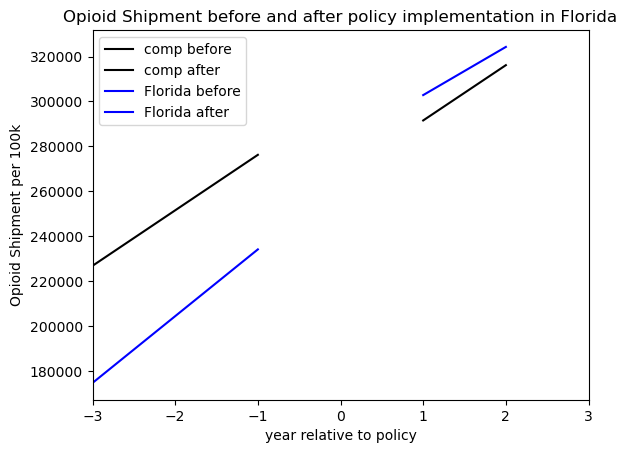

In [52]:
plt.xlim(-3, 3)
#plt.ylim(0, 500)
plt.title("Opioid Shipment before and after policy implementation in Florida")
plt.xlabel("year relative to policy")
plt.ylabel("Opioid Shipment per 100k")
plt.plot(X_b41, y_pred_b41,color='k', label = "comp before")
plt.plot(X_after1, y_pred_after1,color='k', label = "comp after")
plt.plot(X_b4, y_pred_b4,color='b', label = "Florida before")
plt.plot(X_after, y_pred_after,color='b', label = "Florida after")
plt.legend()
plt.show()